In [1]:
# import package
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

1. 정확도 그래프가 일정하게 유지되는 케이스:
- 과소적합인 경우
- 정확한 모델을 사용하지 않은경우

2. 정확도가 증가하다가 감소하는 경우:
- learning rate를 줄인다.

In [2]:
# 위스콘신 유방암 데이터 불러오기

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,863270,B,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,...,13.290,27.49,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185
1,87556202,M,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,...,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
2,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,...,11.020,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
3,909220,B,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,...,15.660,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234
4,9010333,B,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,...,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431


In [5]:
test.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.34030,0.14180,0.2218,0.07820
1,9112594,B,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
2,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
3,9012795,M,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666
4,922297,B,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,...,15.05,24.75,99.17,688.6,0.1264,0.2037,0.13770,0.06845,0.2249,0.08492


In [6]:
# M=1, B=0 으로 변환합니다.
train['diagnosis'] = train['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
test['diagnosis'] = test['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [7]:
seed = 531

In [8]:
# 모델을 훈련할 데이터를 정의합니다. value함수는 데이터 프레임을 array형식으로 바꿔줌
train_input = train[['concave points_mean','concavity_mean']].values
train_target = train['diagnosis'].values

# 모델을 테스트할 데이터를 정의합니다.
test_input = test[['concave points_mean','concavity_mean']].values
test_target = test['diagnosis'].values

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_dim = 2, activation = 'relu'),
    tf.keras.layers.Dense(30, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
]) 

# compile같은 경우에는 추가적으로 learning rate를 조절할 수 있음.
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',  # mean_squared_error
              metrics=['binary_accuracy']) #binary_accuracy 

In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391 (1.53 KB)

 Trainable params: 391 (1.53 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
np.random.seed(seed)
tf.random.set_seed(seed)

In [28]:
# batch_size를 제한하는 이유: 전체 샘플수 보다 작게해서 제한을 둠(성능이슈) 
history = model.fit(train_input, train_target, epochs = 30 , batch_size = 10)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - binary_accuracy: 0.6387 - loss: 0.6933 
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - binary_accuracy: 0.6387 - loss: 0.6748
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - binary_accuracy: 0.6387 - loss: 0.6593
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - binary_accuracy: 0.6387 - loss: 0.6426
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - binary_accuracy: 0.6485 - loss: 0.6224
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - binary_accuracy: 0.6947 - loss: 0.5971
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - binary_accuracy: 0.7676 - loss: 0.5657
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - binary_accuracy: 0.8123 - loss: 0.5301
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - binary_accuracy: 0.8377 - loss: 0.4919
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - binary_accuracy: 0.8560 - loss: 0.4547
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - binary_accura

In [13]:
# 모델 정확도 확인
model.evaluate(train_input, train_target)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - binary_accuracy: 0.8808 - loss: 0.2986


[0.2933045029640198, 0.8908450603485107]

In [14]:
model.evaluate(test_input, test_target)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - binary_accuracy: 0.8953 - loss: 0.2768


[0.2679462134838104, 0.9014084339141846]

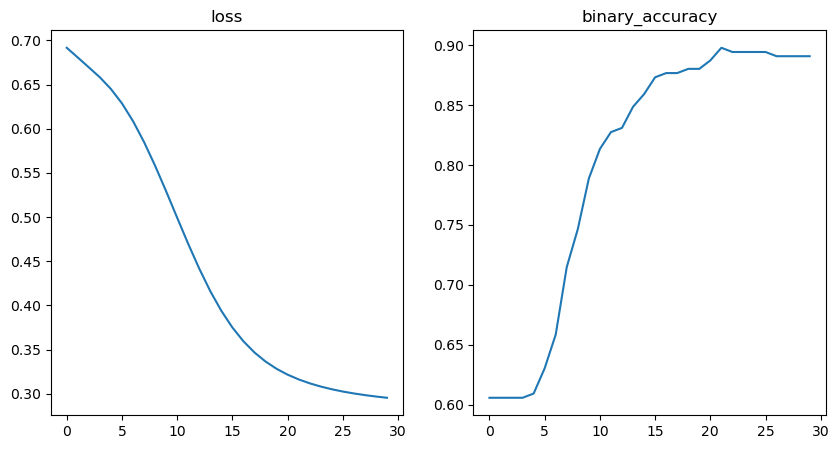

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(history.history['binary_accuracy'])
plt.title('binary_accuracy')
plt.show()

- 학습(epoch)이 진행됨에 따라서 loss 또는 accuracy가 어떻게 바뀌는지 알 수 있음.
- loss는 학습이 진행됨에 따라서 0에 가까운 값으로 가고있다.(0으로 갈수록 좋은것)

#### 기울기 소실 현상
- loss는 학습 초기에 급격하게 내려갔다가, 학습이 진행될수록 내려가는 폭이 작아짐.
- 이상상황: loss가 갑자기 상승하거나, 급격하게 변동하는 상황.

- accuracy는 우상향 하는 그래프를 보여주고 있음.
- 대부분의 그래프에서는 log.shape 형태로 나타남.
- 가면갈수록 가중치 조절이 작아지기 때문에, accuracy의 상승폭이 줄어듬.
- 학습에 따라서 약간 줄어들 수 있음.

##### accuracy 이상현상
- accuracy가 감소한다.
- 낮은 accuracy에서 증가하지 않는다.
- accuracy의 변동이 크다.

In [19]:
history.history['binary_accuracy']

[0.6056337952613831,
 0.6056337952613831,
 0.6056337952613831,
 0.6056337952613831,
 0.6091549396514893,
 0.6302816867828369,
 0.658450722694397,
 0.7147887349128723,
 0.7464788556098938,
 0.7887324094772339,
 0.8133803009986877,
 0.827464759349823,
 0.8309859037399292,
 0.8485915660858154,
 0.8591549396514893,
 0.8732394576072693,
 0.8767605423927307,
 0.8767605423927307,
 0.8802816867828369,
 0.8802816867828369,
 0.8873239159584045,
 0.8978873491287231,
 0.8943662047386169,
 0.8943662047386169,
 0.8943662047386169,
 0.8943662047386169,
 0.8908450603485107,
 0.8908450603485107,
 0.8908450603485107,
 0.8908450603485107]

In [20]:
result = model.predict(test_input) >= .5

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [21]:
# 정확도
(result[:,0] == test_target).sum() / len(test_target)

0.9014084507042254

##### train: 모델의 학습에 이용되는 데이터 
##### validation: 모델의 학습을 검증하는 데이터(과적합, 과소적합등 문데를 확인하는 방향성을 잡기 위함)
##### test: 모델의 성능을 확인하는 데이터(학습에 관여하지 않음)